In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [740]:
median_house_hold_in_come = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
state_pop = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/pop_by_state.csv')

Text(0.5, 1.0, 'Total percentage of population, by race')

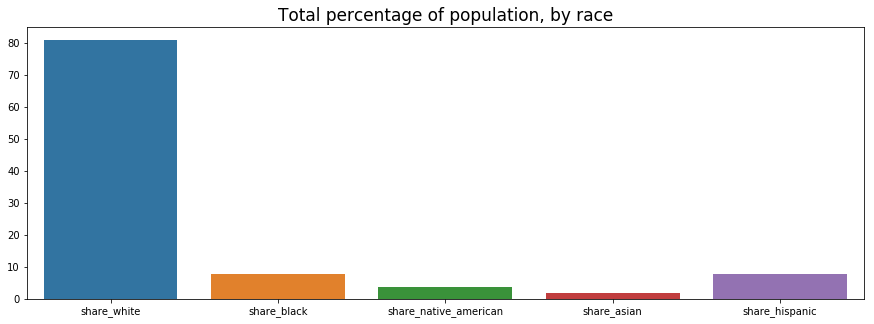

In [741]:
share_race_city[share_race_city['share_black']=='(X)']
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city['share_black']= share_race_city['share_black'].apply(pd.to_numeric)
share_race_city['share_white']= share_race_city['share_white'].apply(pd.to_numeric)
share_race_city['share_native_american']= share_race_city['share_native_american'].apply(pd.to_numeric)
share_race_city['share_asian']= share_race_city['share_asian'].apply(pd.to_numeric)
share_race_city['share_hispanic']= share_race_city['share_hispanic'].apply(pd.to_numeric)
plt.figure(figsize=(15,5))
sns.barplot(share_race_city.groupby('Geographic area').mean().mean(axis=0).index,share_race_city.groupby('Geographic area').mean().mean(axis=0))
plt.title("Total percentage of population, by race", fontsize=17)

Text(0.5, 1.0, 'Total number of people killed, by race')

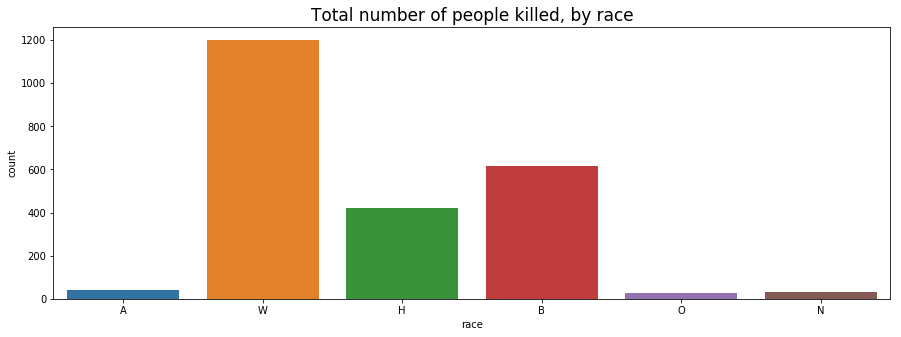

In [720]:
plt.figure(figsize=(15,5))
sns.countplot(data=kill, x="race")
plt.title("Total number of people killed, by race", fontsize=17)

In [722]:
races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = kill.race.loc[(kill.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)

[39, 1201, 423, 618, 31, 28]


In [723]:
conditions = [kill["race"]=="A", kill["race"]=="W", kill["race"]=="H", kill["race"]=="B", kill["race"]=="N", kill["race"]=="O"]
numbers = [14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

kill["total_population"] = np.select(conditions, numbers, default="zero")

kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,total_population
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,14674252
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,223553265
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,50477594
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,223553265
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,50477594


In [742]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/14674252.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/223553265.0
        print (prop_i_killed)
    elif i == "H":
        prop_i_killed = killed_per_race[2]/50477594.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/38929319.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2932248.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/22579629.0
        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)

2.6577163864979287e-06
5.3723214465241655e-06
8.379955669043972e-06
1.5874924500991144e-05
1.0572093492774145e-05
1.240055804282701e-06


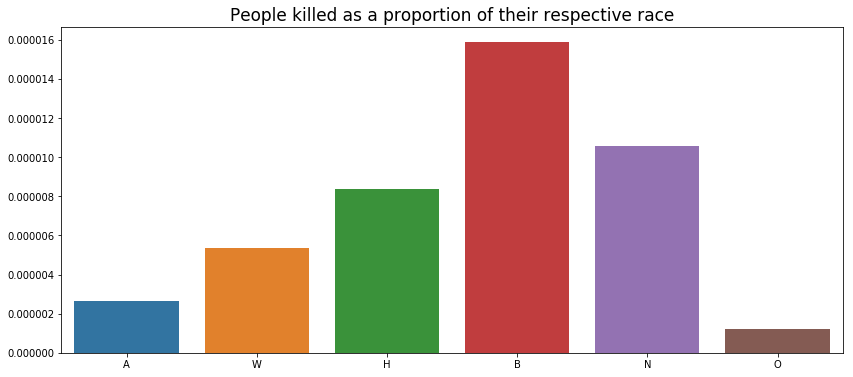

In [743]:
plt.figure(figsize=(14,6))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(x=races, y=prop_killed_per_race)

[4, 5, 6, 7]

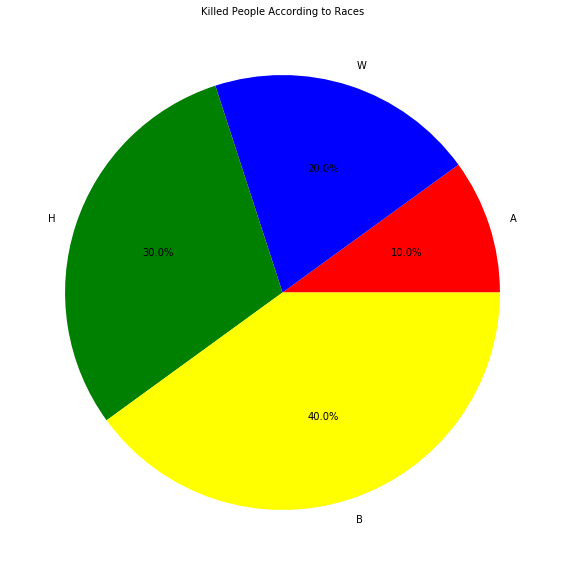

In [750]:
label = ['A','W','H','B']
size  = x
explode = [0,0,0,0]
color = ["red","blue","green","yellow"]

plt.figure(figsize=(10,10))
plt.pie(size,explode = explode,labels = label,colors=color,autopct='%.1f%%')
plt.title("Killed People According to Races",color = "black",fontsize = 10)
y

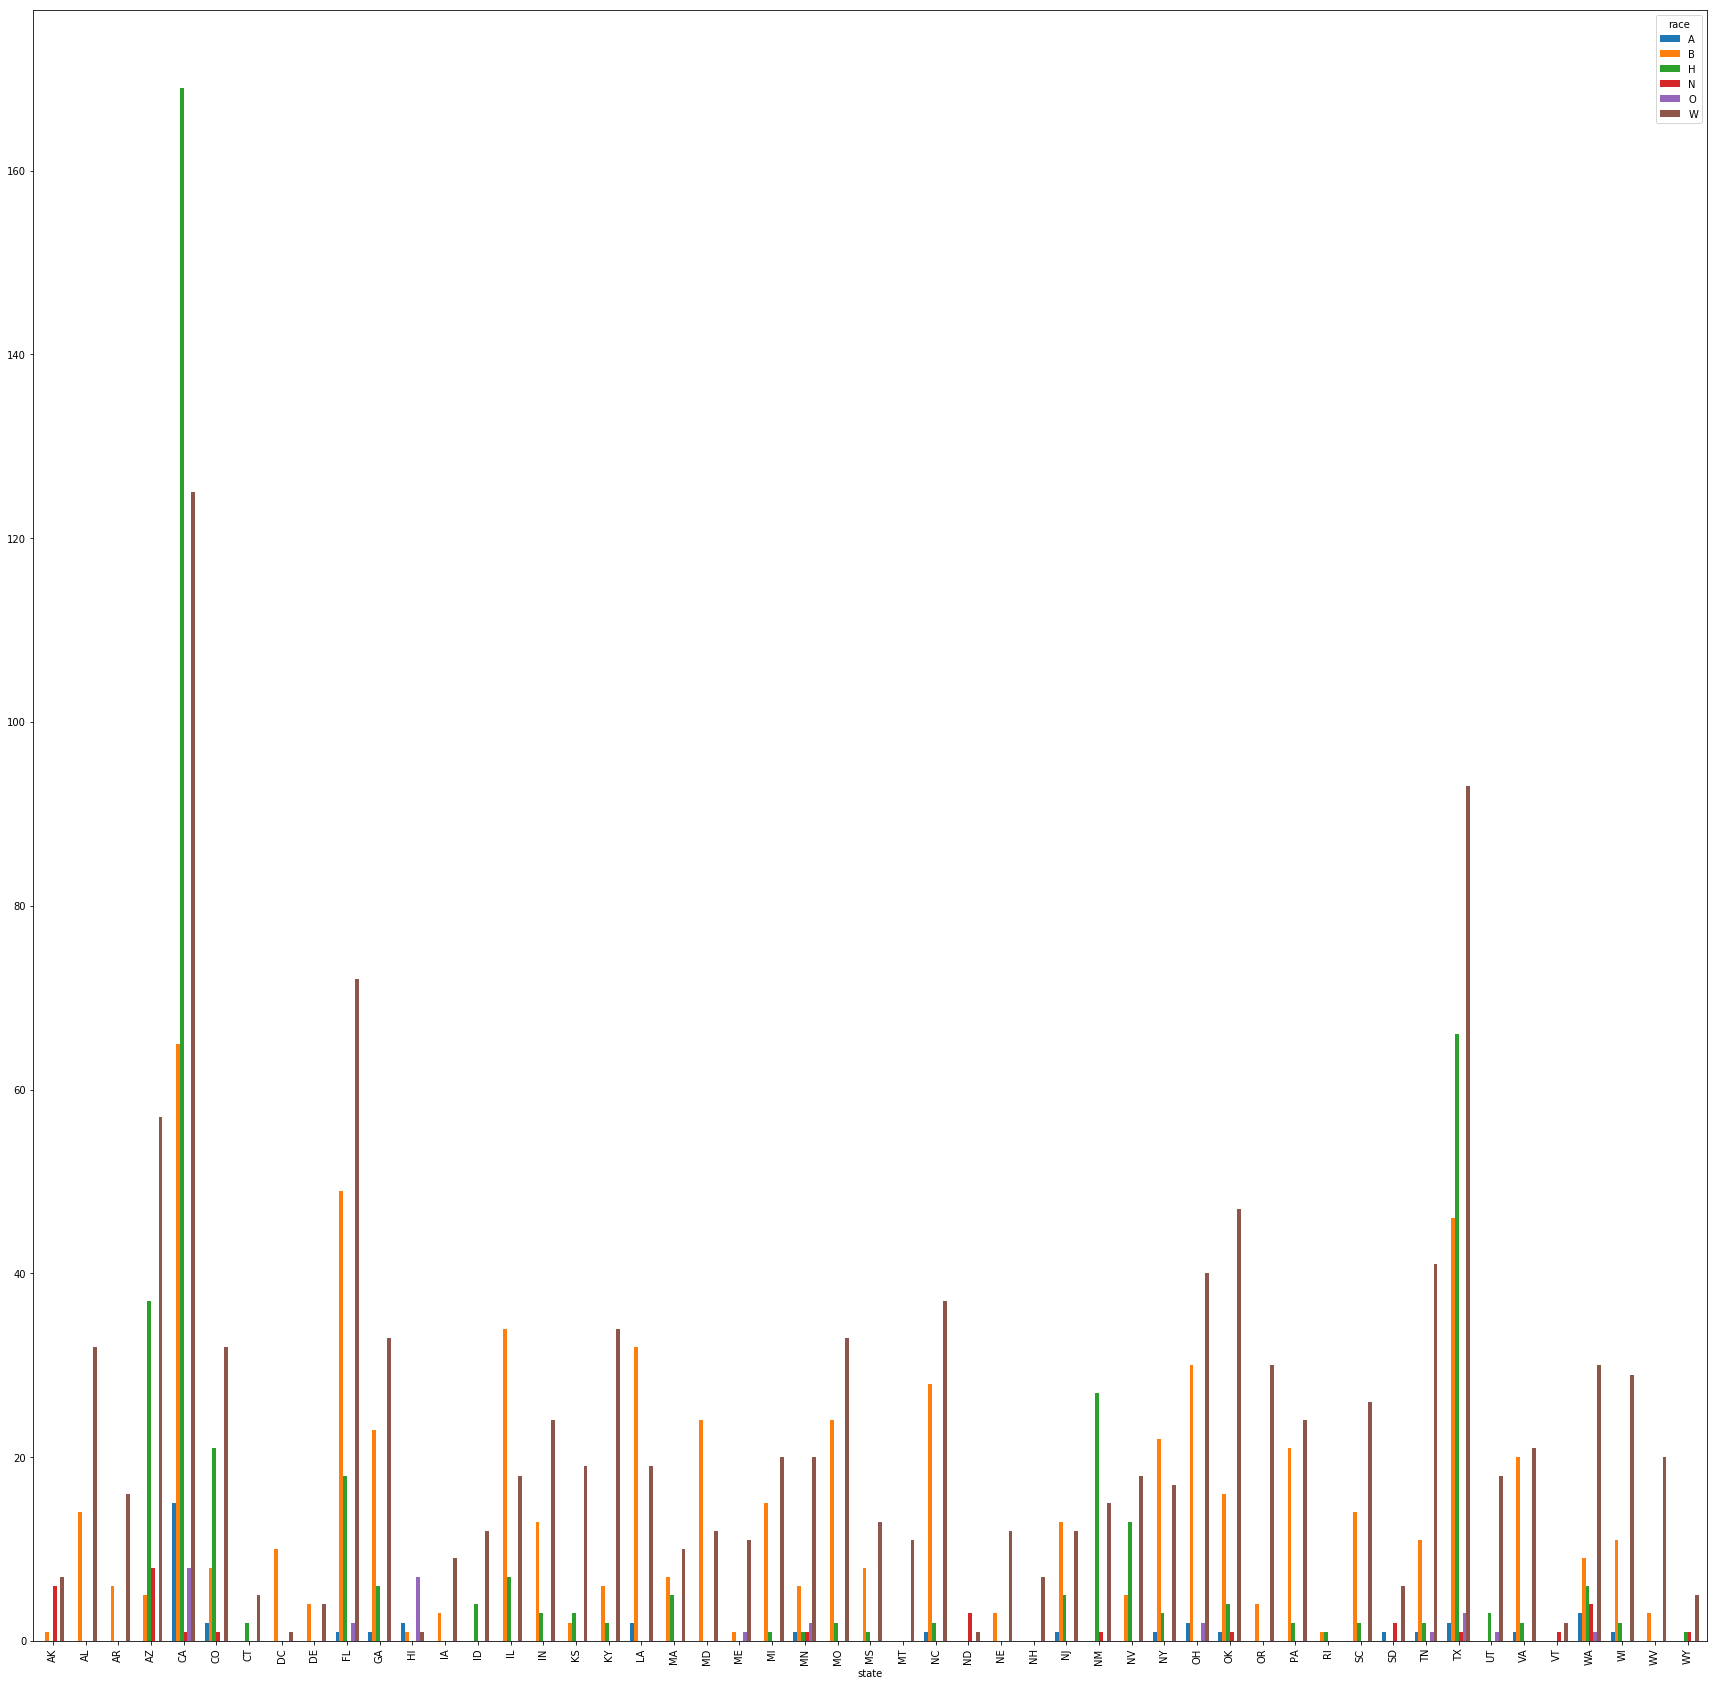

In [5]:
kill_sort = pd.DataFrame()
kill_race_state = kill.groupby(['state','race']).count()
kill_sort['state'] = kill['state'].sort_values()
kill_race_state.index.levels[1][0:6]
plt.rcParams["figure.figsize"] = (30,30)
kill_race_state['id'].unstack(level=1).plot(kind='bar', subplots=False,width=.7)
#fig = plt.figure(1, figsize=(9, 6))
plt.show()

In [349]:
#kill_race_state.index.levels[1]
kill[kill['race']=='B']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
9,17,Leslie Sapp III,6/1/2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
11,21,Ron Sneed,7/1/2015,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,7/1/2015,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
14,27,Omarr Julian Maximillian Jackson,7/1/2015,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
17,36,Artago Damon Howard,8/1/2015,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
28,51,Mario Jordan,14/01/15,shot,gun,34.0,M,B,Chesapeake,VA,True,attack,Not fleeing,False
32,56,Donte Sowell,15/01/15,shot,gun,27.0,M,B,Indianapolis,IN,False,attack,Foot,False
33,57,Kavonda Earl Payton,15/01/15,shot,gun,39.0,M,B,Aurora,CO,False,attack,Not fleeing,False
39,74,Terence Walker,17/01/15,shot,gun,21.0,M,B,Muskogee,OK,False,attack,Foot,True


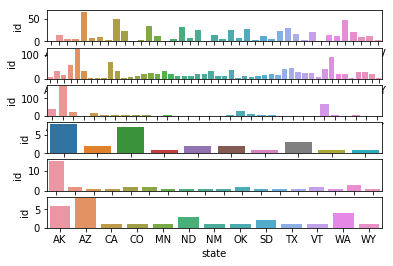

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,,
AK,1,1,1,1,1,1,1,1,1,1,1,1,1
AL,14,14,14,14,14,14,14,14,14,14,14,14,14
AR,6,6,6,6,6,6,6,6,6,6,6,5,6
AZ,5,5,5,5,5,5,5,5,5,5,5,5,5
CA,65,65,65,65,63,64,65,65,65,65,65,65,65


In [355]:
f, a = plt.subplots(6,1)

kill_black    = kill[kill.race == 'B'].groupby('state').count()
kill_white    = kill[kill.race == 'W'].groupby('state').count()
kill_hispanic = kill[kill.race == 'H'].groupby('state').count()
kill_other    = kill[kill.race == 'O'].groupby('state').count()
kill_asian    = kill[kill.race == 'A'].groupby('state').count()
kill_native   = kill[kill.race == 'N'].groupby('state').count()
sns.barplot(kill_black.index,kill_black['id'],ax=a[0])
sns.barplot(kill_white.index,kill_white['id'],ax=a[1])
sns.barplot(kill_hispanic.index,kill_hispanic['id'],ax=a[2])
sns.barplot(kill_other.index,kill_other['id'],ax=a[3])
sns.barplot(kill_asian.index,kill_asian['id'],ax=a[4])
sns.barplot(kill_native.index,kill_native['id'],ax=a[5])


plt.show()

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, 'Count of Race Killed ')]

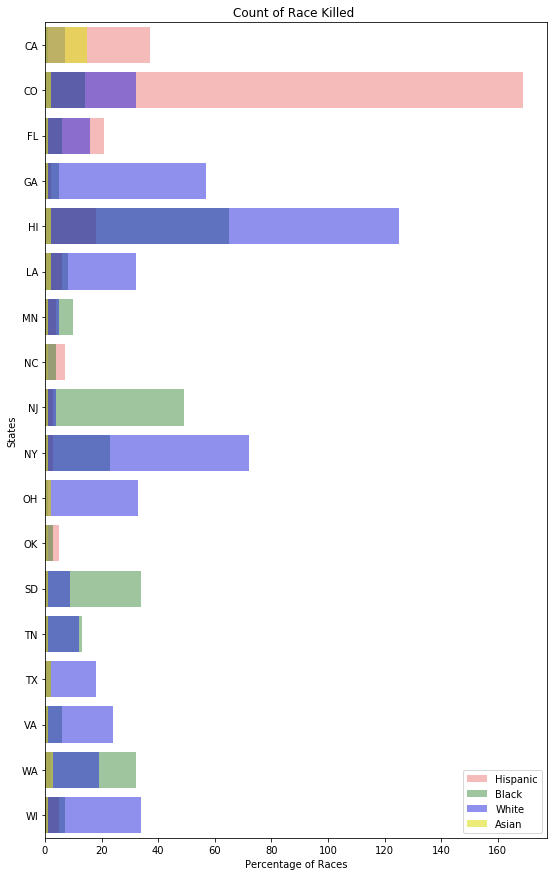

In [756]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=kill_hispanic['id'].dropna(),y=kill_hispanic.index,color='red',alpha = 0.3,label='Hispanic')
sns.barplot(x=kill_black['id'].dropna(),   y=kill_black.index,color='green',alpha = 0.4,label='Black' )
sns.barplot(x=kill_white['id'].dropna(),   y=kill_white.index,color='blue',alpha = 0.5,label='White')
sns.barplot(x=kill_asian['id'].dropna(),   y=kill_asian.index,color='yellow',alpha = 0.6,label='Asian')
#sns.barplot(x=kill_other['id'].dropna(),   y=kill_other.index,color='red',alpha = 0.5,label='Other')
#sns.barplot(x=kill_native['id'].dropna(),   y=kill_native.index,color='pink',alpha = 0.5,label='Other')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Count of Race Killed ")

In [681]:
kill['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

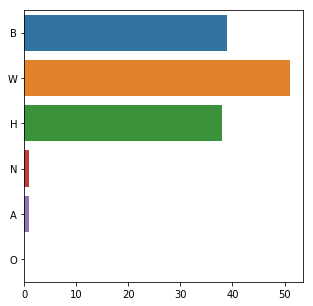

In [699]:
kill_black_undet = kill[(kill['race']=='B') & (kill['threat_level'] == 'undetermined')].race.count()
kill_white_undet = kill[(kill['race']=='W') & (kill['threat_level'] == 'undetermined')].race.count()
kill_hisp_undet  = kill[(kill['race']=='H') & (kill['threat_level'] == 'undetermined')].race.count()
kill_native_undet = kill[(kill['race']=='N') & (kill['threat_level'] == 'undetermined')].race.count()
kill_asian_undet  = kill[(kill['race']=='A') & (kill['threat_level'] == 'undetermined')].race.count()
kill_other_undet  = kill[(kill['race']=='O') & (kill['threat_level'] == 'undetermined')].race.count()
kill_undetermined = [kill_black_undet,kill_white_undet,kill_hisp_undet,kill_native_undet,kill_asian_undet,kill_other_undet]
kill_undetermined
f,ax = plt.subplots(figsize = (5,5))

sns.barplot(x=kill_undetermined,y=['B','W','H','N','A','O'],label='Undetermined Count')

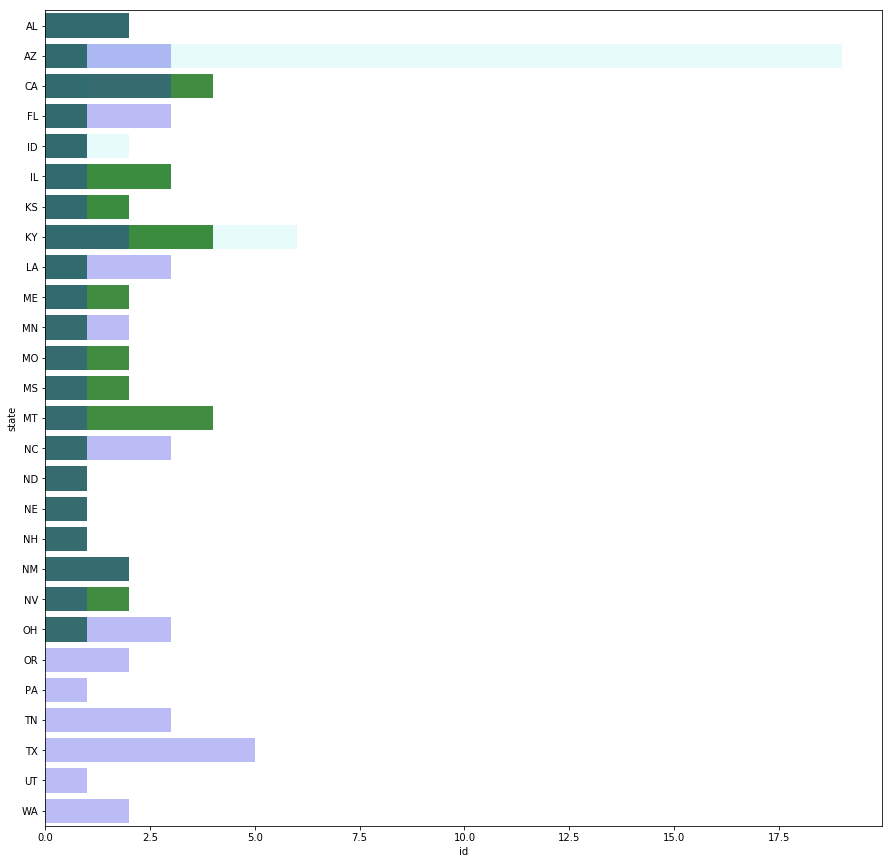

In [718]:
kill_black_state_undet = kill[(kill['race']=='B') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_white_state_undet = kill[(kill['race']=='W') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_hisp_state_undet  = kill[(kill['race']=='H') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_native_state_undet = kill[(kill['race']=='N') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_asian_state_undet  = kill[(kill['race']=='A') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_other_state_undet  = kill[(kill['race']=='O') & (kill['threat_level'] == 'undetermined')].groupby('state').count()
kill_undetermined_state = [kill_black_state_undet,kill_white_state_undet,kill_hisp_state_undet,kill_native_state_undet,kill_asian_state_undet,kill_other_state_undet]
kill_undetermined
f,ax = plt.subplots(figsize = (15,15))
sns.barplot(x=kill_hisp_state_undet['id'],    y=kill_hisp_state_undet.index,color='cyan',alpha = 0.1,label='Hispanic')
sns.barplot(x=kill_black_state_undet['id'],   y=kill_black_state_undet.index,color='green',alpha = 0.8,label='Black' )
sns.barplot(x=kill_white_state_undet['id'],   y=kill_white_state_undet.index,color='blue',alpha = 0.3,label='White')
sns.barplot(x=kill_asian_state_undet['id'],   y=kill_asian_state_undet.index,color='yellow',alpha = 0.5,label='Asian')
#sns.barplot(x=kill_other_state_undet['id'],   y=kill_other_state_undet.index,color='red',alpha = 0.5,label='Other')
#sns.barplot(x=kill_native_state_undet['id'],  y=kill_native_state_undet.index,color='pink',alpha = 0.5,label='Other')


Text(0.5, 1.0, 'Undetermined Police Shootings According to Race')

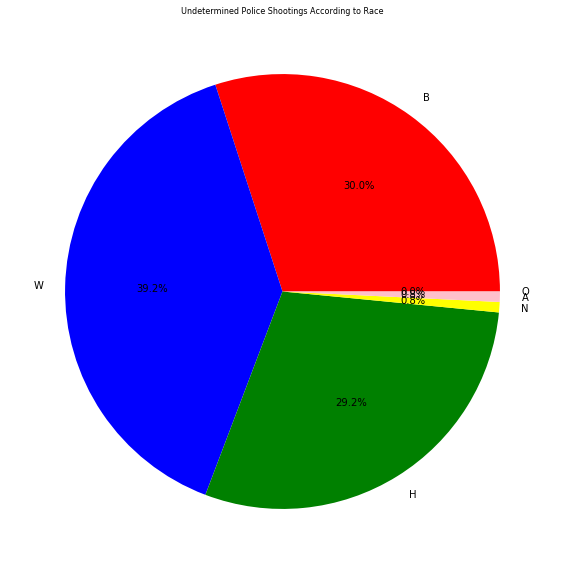

In [701]:
label = ['B','W','H','N','A','O']
size  = kill_undetermined
explode = [0,0,0,0,0,0]
color = ["red","blue","green","yellow","pink",'black']

plt.figure(figsize=(10,10))
plt.pie(size,explode = explode,labels = label,colors=color,autopct='%.1f%%')
plt.title("Undetermined Police Shootings According to Race",color = "black",fontsize = 8)

In [148]:
kill_black_state    = kill.loc[(kill.race=='B') ].state.unique()
kill_white_state    = kill.loc[(kill.race=='W') ].state.unique()
kill_hispanic_state = kill.loc[(kill.race=='H') ].state.unique()
kill_asian_state    = kill.loc[(kill.race=='A') ].state.unique()
kill_native_state   = kill.loc[(kill.race=='N') ].state.unique()
kill_other_state    = kill.loc[(kill.race=='O') ].state.unique()

In [152]:
kill_black_state.sort()
kill_white_state.sort()
kill_hispanic_state.sort()
kill_asian_state.sort()
kill_native_state.sort()
kill_other_state.sort()
kill_black_state,kill_white_state,kill_native_state,kill_other_state,kill_asian_state,kill_hispanic_state

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'DC', 'DE', 'FL', 'GA', 'HI',
        'IA', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
        'MO', 'MS', 'NC', 'NE', 'NJ', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
        'RI', 'SC', 'TN', 'TX', 'VA', 'WA', 'WI', 'WV'], dtype=object),
 array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT',
        'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array(['AK', 'AZ', 'CA', 'CO', 'MN', 'ND', 'NM', 'OK', 'SD', 'TX', 'VT',
        'WA', 'WY'], dtype=object),
 array(['CA', 'FL', 'HI', 'ME', 'MN', 'OH', 'TN', 'TX', 'UT', 'WA'],
       dtype=object),
 array(['CA', 'CO', 'FL', 'GA', 'HI', 'LA', 'MN', 'NC', 'NJ', 'NY', 'OH',
        'OK', 'SD', 'TN', 'TX', 'VA', 'WA', 'WI'], dtype=object),
 array(['

In [396]:
import scipy.stats as stats
temp = pd.DataFrame()
temp['race'] = np.where((kill.race.str.contains('B', regex=True)), 1, 0)
print('test sample size:', len(temp[temp.race == 1]))
print('control sample size:', len(temp[temp.race == 0]))
print('test proportion:', temp.mean())
print()
#print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
#print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())
#stats.ttest_ind(temp[temp.race == 1],temp[temp.race == 0],equal_var=False)
#stats.ttest_ind(x,y,equal_var=False)

#temp[temp.race==1].shape,temp[temp.race==0].shape

test sample size: 813
control sample size: 1722
test proportion: race    0.32071
dtype: float64



In [566]:
kill['race'].unique()
#np.where((kill.race.str.contains(kill['race'].unique()[1], regex=True)), 1, 0)

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [546]:
kill['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [592]:
kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('B', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
black_t, black_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('W', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
white_t, white_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('H', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
hisp_t, hisp_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('A', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
asian_t, asian_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('N', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
native_t, native_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('O', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
other_t, other_p = stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

race_p_values = [black_p, white_p, hisp_p, asian_p, native_p, other_p]
print(race_p_values)

[0.26504814592776615, 2.102910619410183e-05, 0.5310346217081071, 9.947146784541988e-17, 1.4373617790239859e-08, 0.00018294550165173722]


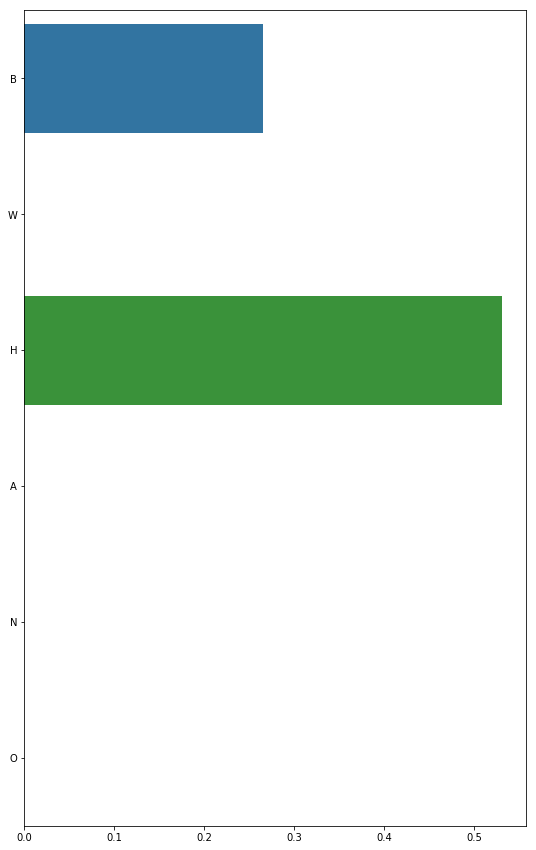

In [610]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=race_p_values,y=['B','W','H','A','N','O'],label='P-Values')

In [419]:
kill[kill['armed']=='unarmed'].race.sum(),kill[kill['armed']=='gun'].race.sum()

(64, 462)

In [420]:
kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('W', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)

Ttest_indResult(statistic=4.35019910175104, pvalue=2.102910619410183e-05)

In [421]:
kill[kill['armed']=='unarmed'].race.sum(),kill[kill['armed']=='gun'].race.sum()

(68, 798)

In [481]:
kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
temp['race'] = np.where((kill.race.str.contains('H', regex=True)), 1, 0)
kill['race']=temp.race
kill[kill['armed']=='gun'].race
=stats.ttest_ind(kill[kill['armed']=='gun'].race,kill[kill['armed']=='unarmed'].race,equal_var=False)
hisp_stat,hisp_p

(0.627434594418646, 0.5310346217081071)

In [431]:
kill[kill['armed']=='unarmed'].race.mean(),kill[kill['armed']=='gun'].race.mean()

(0.2046783625730994, 0.22532188841201717)

In [153]:
kill_black_prop = pd.DataFrame()
kill_white_prop = pd.DataFrame()
kill_hispanic_prop = pd.DataFrame()
kill_asian_prop = pd.DataFrame()
kill_native_prop = pd.DataFrame()
kill_other_prop = pd.DataFrame()

kill_black_prop['State']      = [x for i,x in enumerate(kill_black_state)]
kill_white_prop['State']      = [x for i,x in enumerate(kill_white_state)]
kill_hispanic_prop['State']   = [x for i,x in enumerate(kill_hispanic_state)]
kill_asian_prop['State']      = [x for i,x in enumerate(kill_asian_state)]
kill_native_prop['State']     = [x for i,x in enumerate(kill_native_state)]
kill_other_prop['State']      = [x for i,x in enumerate(kill_other_state)]


kill_black_prop['Prop']    =  [kill_black['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['B'] for i,x in enumerate(kill_black_state)]
kill_white_prop['Prop']    =  [kill_white['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['W'] for i,x in enumerate(kill_white_state)]
kill_hispanic_prop['Prop'] =  [kill_hispanic['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['H'] for i,x in enumerate(kill_hispanic_state)]
kill_asian_prop['Prop']    =  [kill_asian['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['A'] for i,x in enumerate(kill_asian_state)]
kill_native_prop['Prop']   =  [kill_native['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['N'] for i,x in enumerate(kill_native_state)]
kill_other_prop['Prop']    =  [kill_other['id'][x]/state_pop.loc[state_pop.StateAbb == x ]['O'] for i,x in enumerate(kill_other_state)]


In [ ]:
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x= 'kill ',y ='poverty ratio',data=data,color='red')
sns.pointplot(x= 'area list',y = 'Ratio', data = data,color='blue')
plt.xlabel("States",fontsize = 15)
plt.ylabel("Values",fontsize = 15)
plt.title("Poverty Ratio (Red) vs High School Gradate (Blue) ",fontsize = 20)
plt.grid()

Text(0.5, 1.0, 'Killed People According to Races')

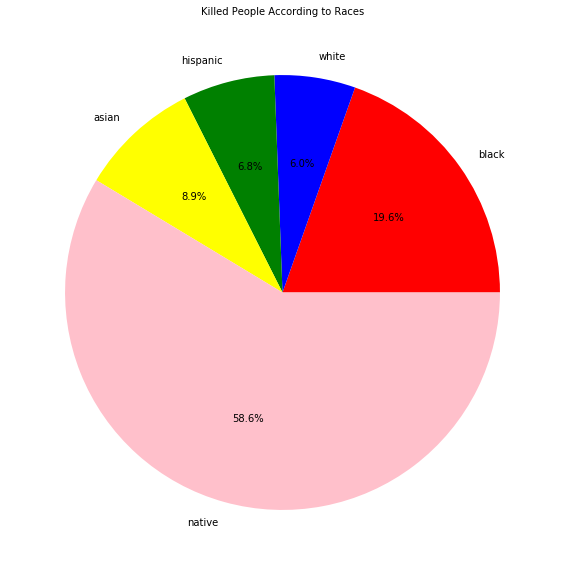

In [459]:
kill_black['id'].dropna().sum()/state_pop.loc[:]['B'].sum()
kill_white['id'].dropna().sum()/state_pop.loc[:]['W'].sum()
bb =kill_black_prop['Prop'].apply(lambda x: float(x))
ww =kill_white_prop['Prop'].apply(lambda x: float(x))
hh =kill_hispanic_prop['Prop'].apply(lambda x: float(x))
aa =kill_asian_prop['Prop'].apply(lambda x: float(x))
nn =kill_native_prop['Prop'].apply(lambda x: float(x))
oo =kill_other_prop['Prop'].apply(lambda x: float(x))
kill_prop_value = [bb.mean()*10000,ww.mean()*10000,hh.mean()*10000,aa.mean()*10000,nn.mean()*10000]
kill_prop_label = ['black','white','hispanic','asian','native']
label = kill_prop_label
size  = kill_prop_value
explode = [0,0,0,0,0]
color = ["red","blue","green","yellow","pink"]

plt.figure(figsize=(10,10))
plt.pie(size,explode = explode,labels = label,colors=color,autopct='%.1f%%')
plt.title("Killed People According to Races",color = "black",fontsize = 10)

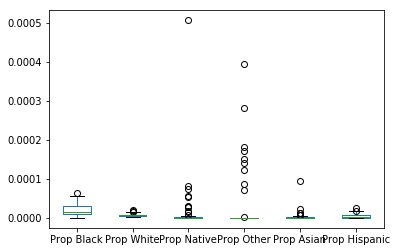

,Prop Black,Prop White,Prop Native,Prop Other,Prop Asian,Prop Hispanic
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.000019,0.000007,0.000018,0.000032,0.000004,0.000005
std,0.000016,0.000004,0.000073,0.000080,0.000014,0.000006
min,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000
25%,0.000010,0.000004,0.000000,0.000000,0.000000,0.000000
50%,0.000015,0.000007,0.000000,0.000000,0.000000,0.000003
75%,0.000030,0.000009,0.000003,0.000000,0.000002,0.000007
max,0.000063,0.000019,0.000507,0.000396,0.000094,0.000027


In [669]:
#axes = kill.drop('id',axis = 1).groupby('race').boxplot()
kill_all = pd.concat([bb,ww,nn,oo,aa,hh],axis=1).fillna(0)
kill_all.columns = ['Prop Black','Prop White','Prop Native','Prop Other','Prop Asian','Prop Hispanic']
kill_all.plot.box()
plt.show()
kill_all.describe()

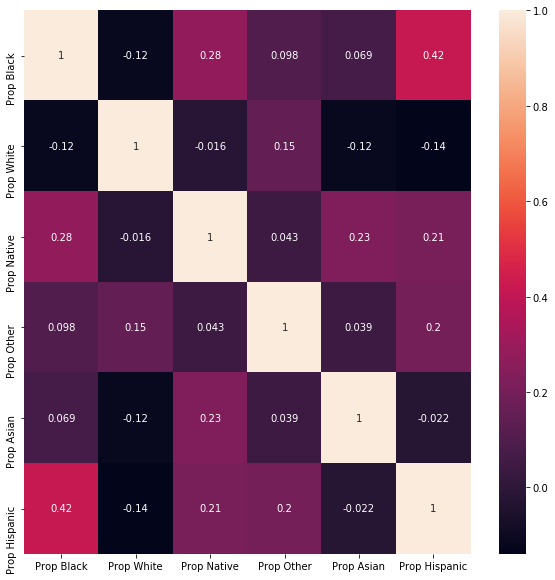

In [665]:
#axes = kill.drop('id',axis = 1).groupby('race').boxplot()
kill_all = pd.concat([bb,ww,nn,oo,aa,hh],axis=1).fillna(0)
kill_all.columns = ['Prop Black','Prop White','Prop Native','Prop Other','Prop Asian','Prop Hispanic']
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(kill_all.corr(),annot=True,ax=ax)
plt.show()

[9.558775757286487, 3.5786211321993675, 2.6029891316306117, 1.913207654894785]

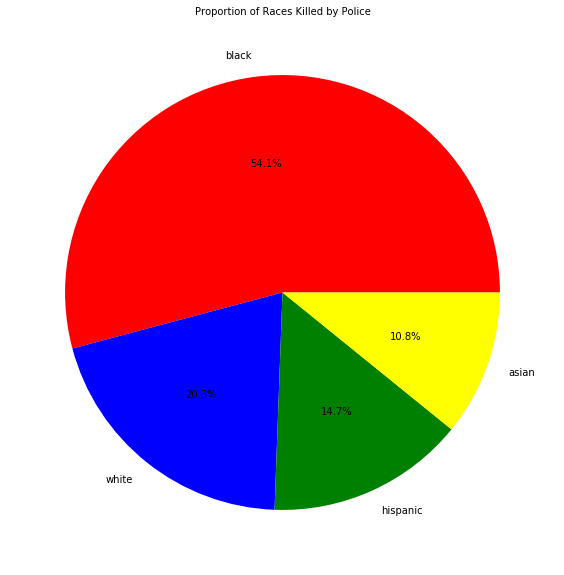

In [753]:
kill_prop_value = [bb.sum()*10000,ww.sum()*10000,hh.sum()*10000,aa.sum()*10000]
kill_prop_label = ['black','white','hispanic','asian']
label = kill_prop_label
size  = kill_prop_value
explode = [0,0,0,0]
color = ["red","blue","green","yellow"]

plt.figure(figsize=(10,10))
plt.pie(size,explode = explode,labels = label,colors=color,autopct='%.1f%%')
plt.title("Proportion of Races Killed by Police",color = "black",fontsize = 10)
kill_prop_value

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Proportion of Races'),
 Text(0.5, 1.0, 'Proportion of Race Killed ')]

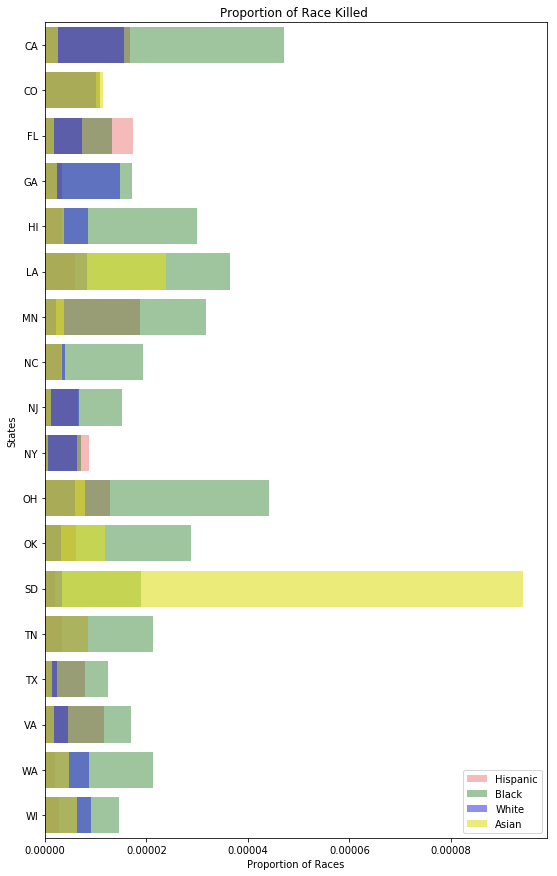

In [759]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=kill_hispanic_prop['Prop'], y=kill_hispanic_prop['State'],color='red',alpha = 0.3,label='Hispanic' )
sns.barplot(x=kill_black_prop['Prop'],    y=kill_black_prop['State']   ,color='green',alpha = 0.4,label='Black' )
sns.barplot(x=kill_white_prop['Prop'],    y=kill_white_prop['State']   ,color='blue',alpha = 0.5,label='White')
sns.barplot(x=kill_asian_prop['Prop'],    y=kill_asian_prop['State']   ,color='yellow',alpha = 0.6,label='Asian')

#sns.barplot(x=kill_native_prop['Prop'],    y=kill_native_prop['State']   ,color='pink',alpha = 0.8,label='White')

#sns.barplot(x=kill_other_prop['Prop'],    y=kill_other_prop['State']   ,color='red',alpha = 0.5,label='Other')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Proportion of Races', ylabel='States',title = "Proportion of Race Killed ")


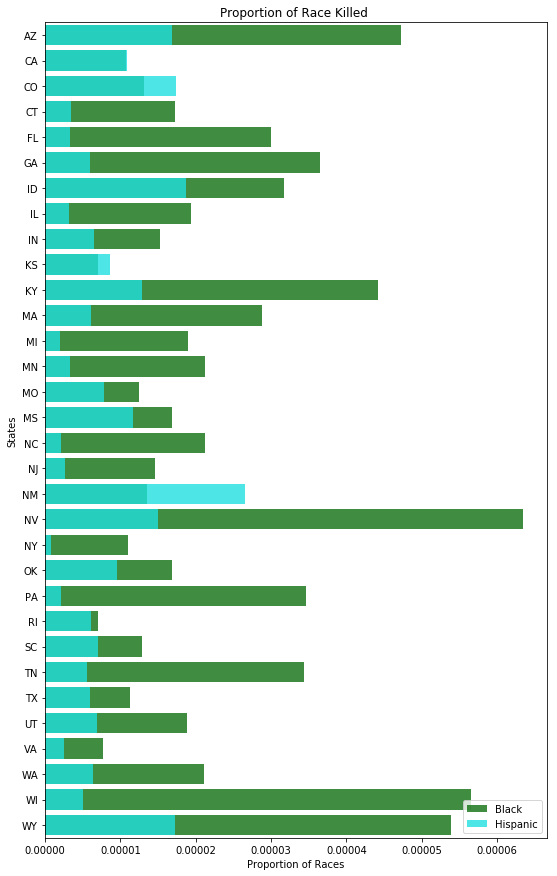

In [208]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=kill_black_prop['Prop'],    y=kill_black_prop['State']   ,color='green',alpha = 0.8,label='Black' )
sns.barplot(x=kill_hispanic_prop['Prop'], y=kill_hispanic_prop['State'],color='cyan',alpha = 0.8,label='Hispanic' )

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Proportion of Races', ylabel='States',title = "Proportion of Race Killed ")
plt.show()

In [202]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [535]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
percentage_people_below_poverty_level['poverty_rate'] = percentage_people_below_poverty_level['poverty_rate'].apply(pd.to_numeric)
ppbpl['Poverty'] = percentage_people_below_poverty_level.groupby('Geographic Area').poverty_rate.sum()
ppbpl['State'] = percentage_people_below_poverty_level['Geographic Area']
#share_race_city['share_black']= share_race_city['share_black'].apply(pd.to_numeric)

C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


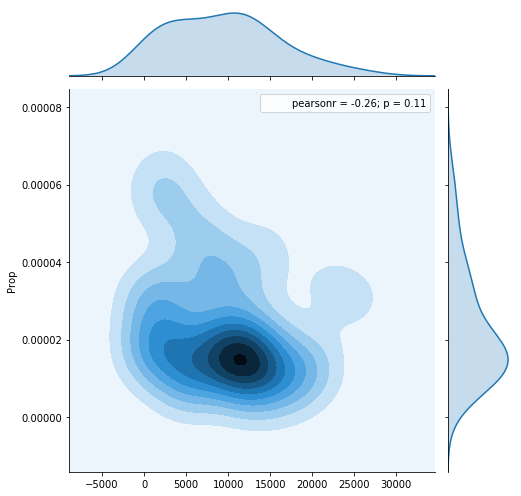

C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


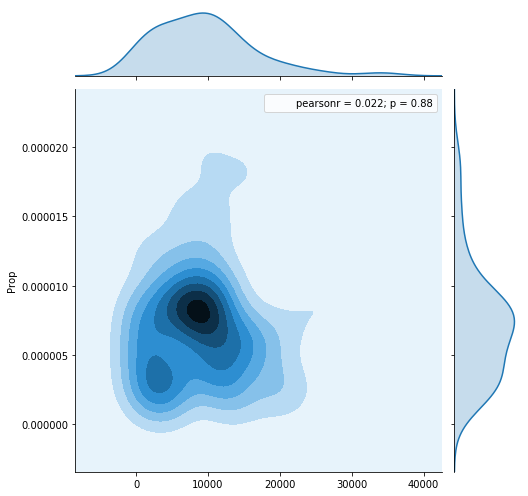

In [534]:
from scipy import stats
ppbpl['State']      = [x for i,x in enumerate(kill_black_state)]
ppbpl['Poverty']    = [ppbpl[i] for i,x in enumerate(kill_black_state)]
g = sns.jointplot(ppbpl['Poverty'],bb,kind='kde',size = 7)
g = g.annotate(stats.pearsonr)
#pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
plt.show()
ppbpl['Poverty']    = [ppbpl[i] for i,x in enumerate(kill_white_state)]
g = sns.jointplot(ppbpl['Poverty'],ww,kind='kde',size = 7)
g = g.annotate(stats.pearsonr)

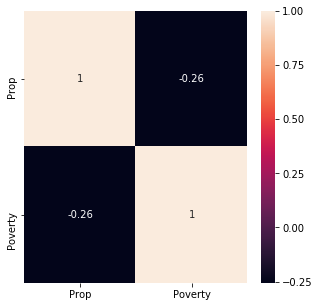

In [474]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(),annot=True,ax=ax)
plt.show()

,Y,X
0,0.0,1398
1,1.0,171
2,2.0,104
3,3.0,1
4,4.0,373
5,5.0,177
6,6.0,2
7,7.0,7
8,8.0,6
9,9.0,117


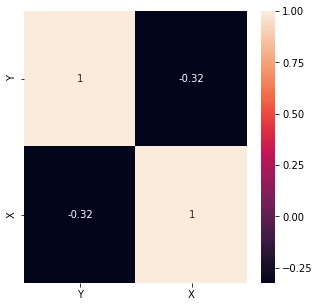

In [530]:
kill = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-1/Lesson 5/PoliceKillingsUS.csv', encoding="windows-1252")
f,ax = plt.subplots(figsize = (5,5))
#plt.show()
kill_cor_count= [kill[kill['armed']==kill['armed'].unique()[i]].armed.count() for i,x in enumerate(kill['armed'].unique())]
kill_corr_count= pd.concat([pd.DataFrame(np.arange(0,68),columns=['Y']),pd.DataFrame(kill_cor_count,columns=['X']),],axis=1)
sns.heatmap(kill_corr_count.corr(),annot=True,ax=ax)
kill_corr_count

In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
#percentage_people_below_poverty_level.poverty_rate.value_counts()

In [7]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [8]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [9]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [10]:
area_list = percentage_people_below_poverty_level["Geographic Area"].unique()

In [11]:
area_list

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [12]:
percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == 'AL'].head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [13]:
poverty_ratio=[]
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate) / len(x)
    poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area list':area_list,'poverty ratio':poverty_ratio})
new_index = (data['poverty ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30],
      dtype=int64)

In [14]:
(data['poverty ratio'].sort_values(ascending=False)).index.values

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30],
      dtype=int64)

In [15]:
sorted_data.head()

,area list,poverty ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


Text(0.5, 1.0, 'Poverty Rate of Each States')

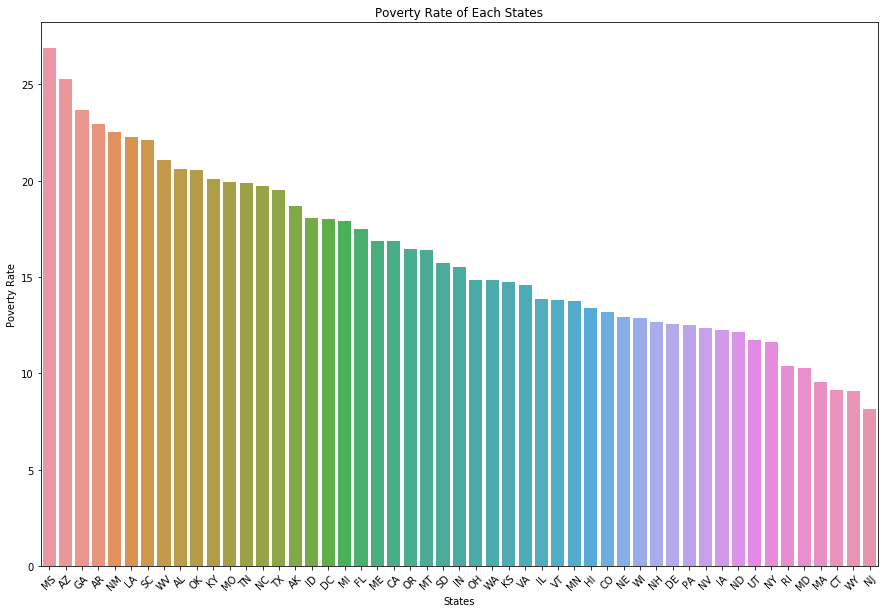

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area list'], y=sorted_data['poverty ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate of Each States')

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
#kill["name"].value_counts().unique()

In [19]:
seperate = kill["name"][kill["name"] != 'TK TK'].str.split()


In [20]:
a,b = zip(*seperate)
name_list = a+b
name_count = Counter(name_list)
name_count = name_count.most_common(15)

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

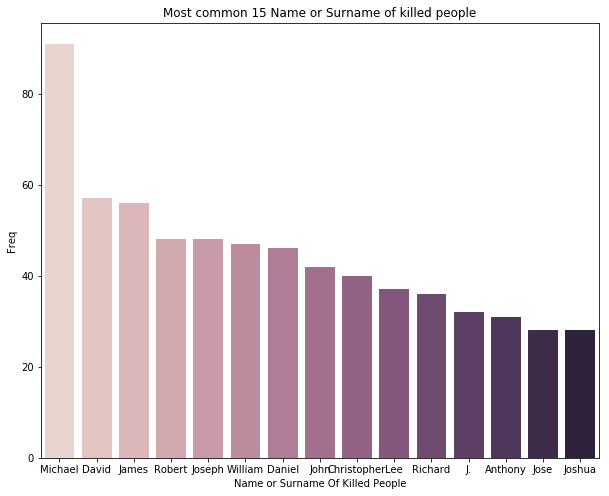

In [21]:
x,y = zip(*name_count)
x,y = list(x),list(y)

plt.figure(figsize=(10,8))
ax = sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname Of Killed People")
plt.ylabel("Freq")
plt.title("Most common 15 Name or Surname of killed people")

In [22]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [23]:
#percent_over_25_completed_highSchool["percent_completed_hs"].value_counts()

In [24]:
percent_over_25_completed_highSchool.replace(["-"],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [25]:
arealist = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highSchool = []
for i in arealist:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool["Geographic Area"] == i]
    highSchool_rate = sum(x.percent_completed_hs)/len(x)
    area_highSchool.append(highSchool_rate)

In [26]:
data = pd.DataFrame({'HighSchool Area':area_list,'Ratio':area_highSchool})
newIndex = data['Ratio'].sort_values(ascending= False).index.values
sorted_list = data.reindex(newIndex)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

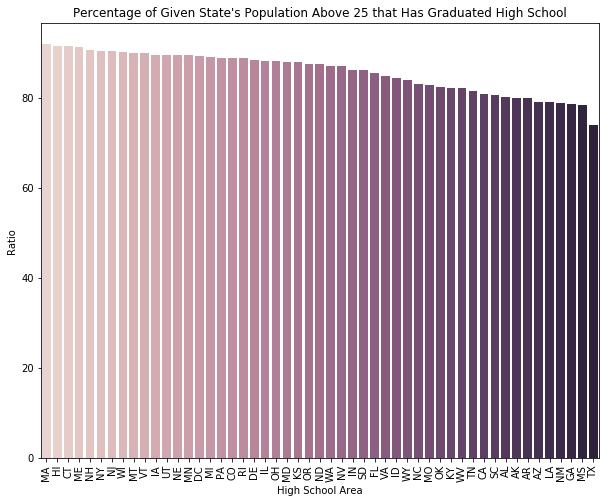

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(sorted_list["HighSchool Area"],sorted_list["Ratio"],palette=sns.cubehelix_palette(len(area_highSchool)))
plt.xlabel("High School Area")
plt.ylabel("Ratio")
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.xticks(rotation = 90)

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

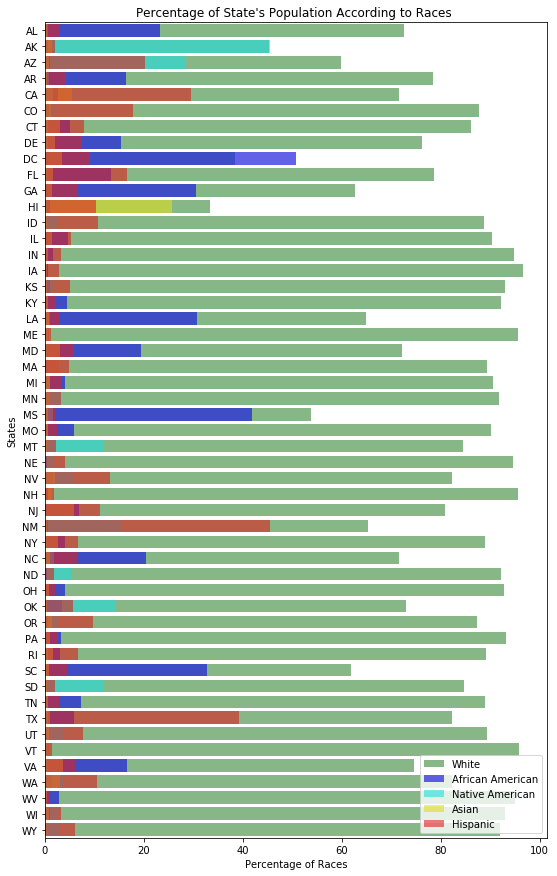

In [28]:
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

In [29]:

sorted_list.head(2)

,HighSchool Area,Ratio
21,MA,92.028455
11,HI,91.665563


In [30]:
sorted_data.head(5)

,area list,poverty ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [31]:
sorted_list["Ratio"] = sorted_list["Ratio"] / max(sorted_list["Ratio"])
sorted_data["poverty ratio"] = sorted_data["poverty ratio"]/ max(sorted_data["poverty ratio"])
data = pd.concat([sorted_data,sorted_list["Ratio"]],axis=1)
data.sort_values('poverty ratio',inplace=True)
data.head()


,area list,poverty ratio,Ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [32]:
sorted_list.head()

,HighSchool Area,Ratio
21,MA,1.000000
11,HI,0.996057
6,CT,0.995254
19,ME,0.993505
29,NH,0.985688


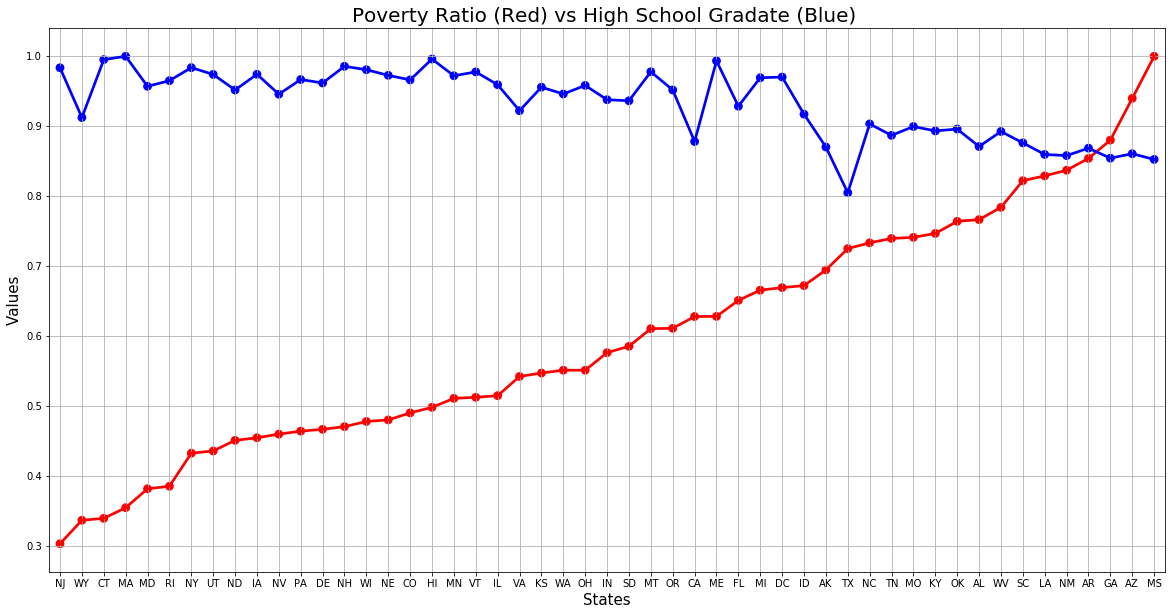

In [33]:
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x= 'area list',y ='poverty ratio',data=data,color='red')
sns.pointplot(x= 'area list',y = 'Ratio', data = data,color='blue')
plt.xlabel("States",fontsize = 15)
plt.ylabel("Values",fontsize = 15)
plt.title("Poverty Ratio (Red) vs High School Gradate (Blue) ",fontsize = 20)
plt.grid()

C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\clyde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\clyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


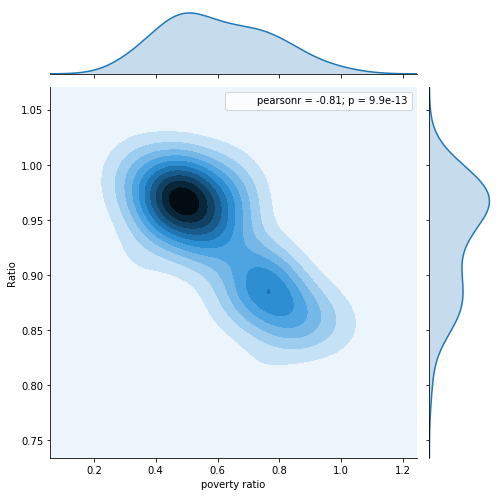

In [34]:
from scipy import stats
g = sns.jointplot(data["poverty ratio"],data["Ratio"],kind='kde',size = 7)
g = g.annotate(stats.pearsonr)
#pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
plt.show()

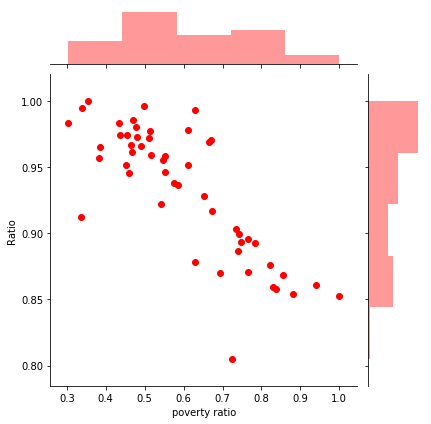

In [35]:
g = sns.jointplot("poverty ratio","Ratio",data = data,color = 'r')


In [304]:
kill.race.head(10)
kill.race.unique()
kill.race.dropna(inplace=True)
kill.race.value_counts().values

array([1201,  618,  423,   39,   31,   28], dtype=int64)

Text(0.5, 1.0, 'Killed People According to Races')

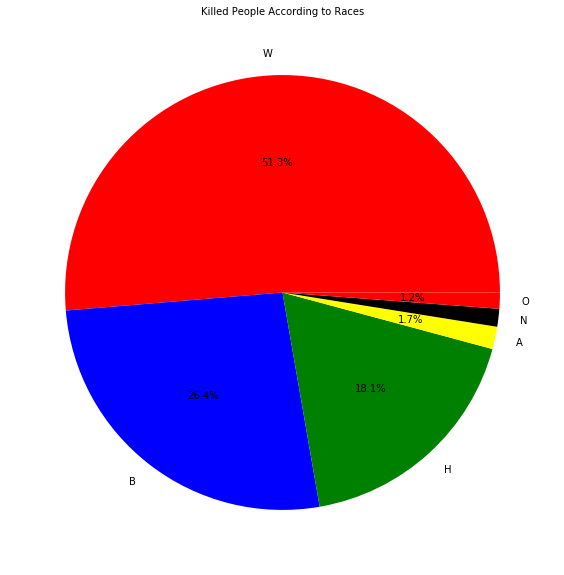

In [37]:
label = kill.race.value_counts().index
size = kill.race.value_counts().values
explode = [0,0,0,0,0,0]
color = ["red","blue","green","yellow","black"]

plt.figure(figsize=(10,10))
plt.pie(size,explode = explode,labels = label,colors=color,autopct='%1.1f%%')
plt.title("Killed People According to Races",color = "black",fontsize = 10)

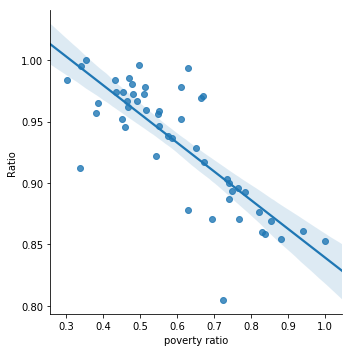

In [38]:
sns.lmplot(data=data,x="poverty ratio",y="Ratio")
plt.show()

In [39]:
data.head()

,area list,poverty ratio,Ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


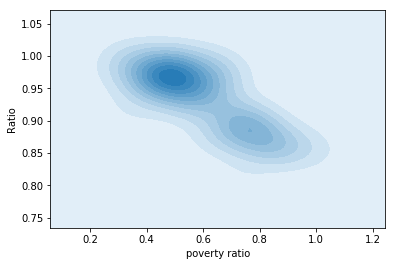

In [40]:
sns.kdeplot(data["poverty ratio"],data["Ratio"], shade=True, cut=3)
plt.show()

In [41]:
data.corr()

,poverty ratio,Ratio
poverty ratio,1.000000,-0.805761
Ratio,-0.805761,1.000000


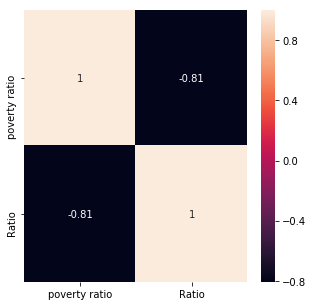

In [42]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(),annot=True,ax=ax)
plt.show()

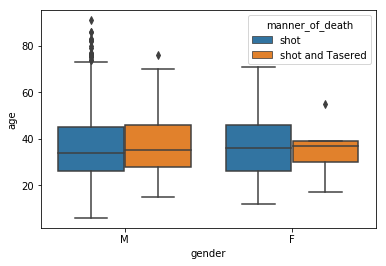

In [43]:
#Manner of death
kill.manner_of_death.unique()
sns.boxplot(x='gender',y="age",hue="manner_of_death",data=kill)
plt.show()

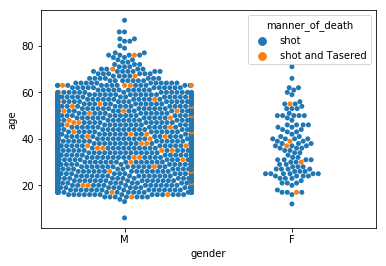

In [44]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill)
plt.show()

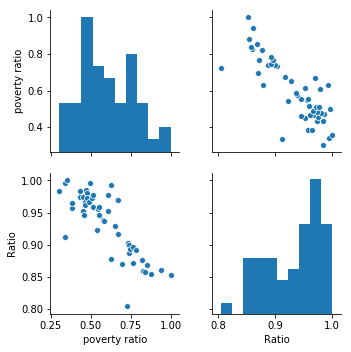

In [45]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Kill table according to gender')

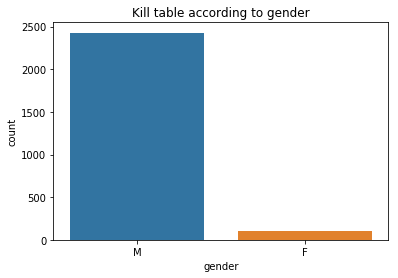

In [46]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
plt.title("Kill table according to gender")

Text(0.5, 1.0, 'Kill Weapon')

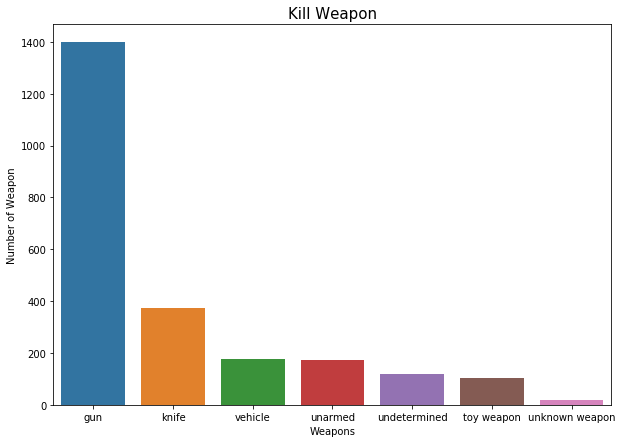

In [47]:
armed = kill.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(armed[:7].index,armed[:7].values)
plt.xlabel("Weapons")
plt.ylabel("Number of Weapon")
plt.title("Kill Weapon",fontsize = 15, color ="black")

Text(0, 0.5, 'Number of')

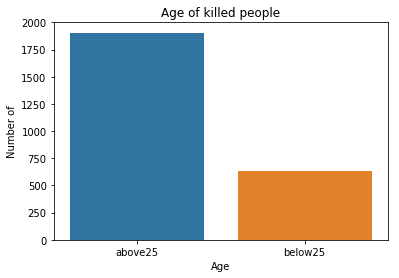

In [48]:
above25 = ['above25' if i >25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(df.age)
plt.title("Age of killed people")
plt.xlabel("Age")
plt.ylabel("Number of")

Text(0.5, 1.0, 'Race of Killed People')

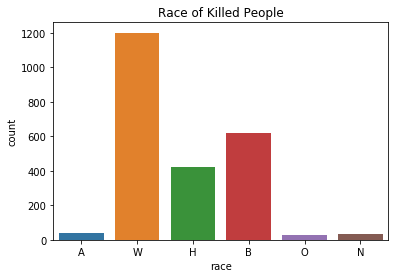

In [49]:
sns.countplot(kill.race)
plt.title("Race of Killed People")

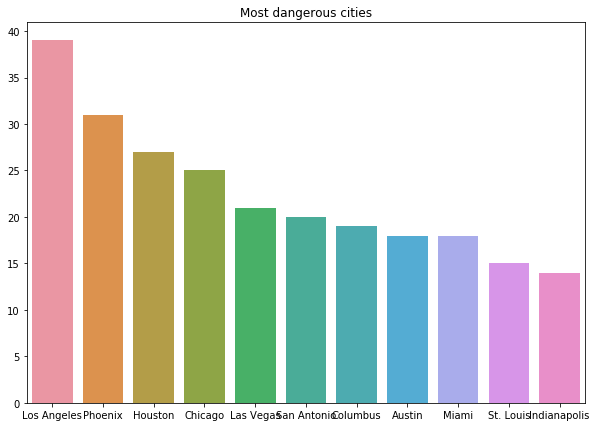

In [50]:
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(city[:11].index,city[:11].values)
plt.title("Most dangerous cities",color="black")
plt.show()


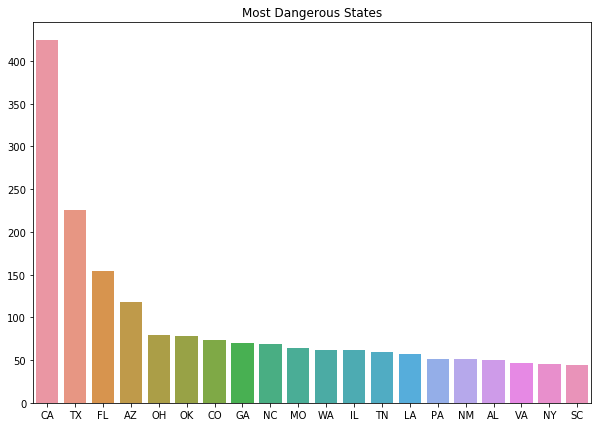

In [51]:
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(state[:20].index,state[:20].values)
plt.title("Most Dangerous States",color="black")
plt.show()

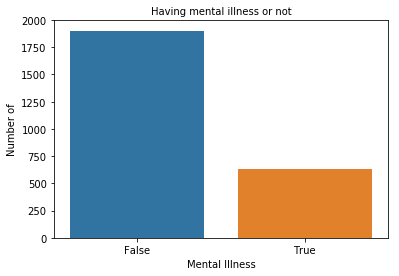

In [52]:
sns.countplot(kill.signs_of_mental_illness)
plt.ylabel("Number of")
plt.xlabel("Mental Illness")
plt.title("Having mental illness or not",fontsize=10)
plt.show()

In [53]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

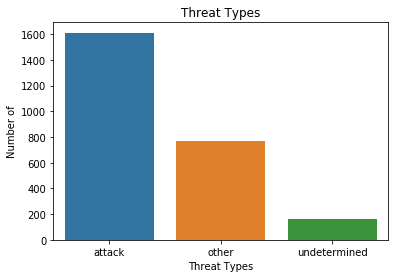

In [54]:
sns.countplot(kill.threat_level)
plt.xlabel("Threat Types")
plt.ylabel("Number of")
plt.title("Threat Types")
plt.show()

In [719]:
%%HTML
<div class='tableauPlaceholder' id='viz1504205405904' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='views&#47;InteractivePoliceKillingsMap&#47;Sheet1?:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InteractivePoliceKillingsMap&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1504205405904');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>